In [1]:
%matplotlib inline
from pymc3 import Model, Normal, invlogit, Binomial, sample, forestplot
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data
n = np.ones(4)*5
y = np.array([0, 1, 3, 5])
dose = np.array([-.86,-.3,-.05,.73])

with Model() as bioassay_model:

    # Prior distributions for latent variables
    alpha = Normal('alpha', 0, sd=100)
    beta = Normal('beta', 0, sd=100)

    # Linear combinations of parameters
    theta = invlogit(alpha + beta*dose)

    # Model likelihood
    deaths = Binomial('deaths', n=n, p=theta, observed=y)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1159.11draws/s]
/Users/hstrey/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


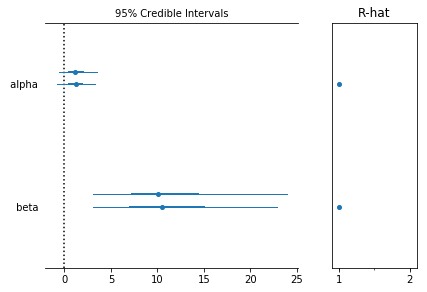

In [3]:
with bioassay_model:

    # Draw wamples
    trace = sample(1000, njobs=2)
    # Plot two parameters
    forestplot(trace, varnames=['alpha', 'beta'])

/Users/hstrey/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,1.280126,1.115638,0.048591,-0.646430,3.525130,326.447707,0.999995
beta,11.486149,5.921555,0.290631,3.056265,23.438266,288.155243,0.999573


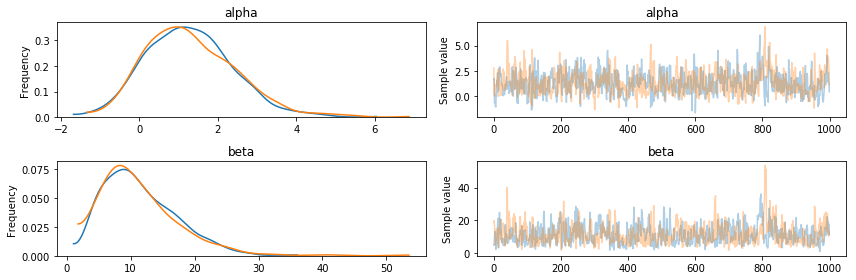

In [4]:
pm.traceplot(trace)
pm.summary(trace)

In [5]:
ld50 = -trace['alpha']/trace['beta']
ld50.shape

(2000,)

(array([0.01670534, 0.06682135, 0.2171694 , 0.26728541, 0.46774947,
        0.95220429, 1.31972173, 2.73967549, 3.39118369, 4.29327196,
        4.76102144, 4.76102144, 3.307657  , 2.73967549, 1.6538285 ,
        0.76844557, 0.60139218, 0.33410677, 0.26728541, 0.15034805,
        0.05011602, 0.01670534, 0.05011602, 0.01670534, 0.10023203,
        0.01670534, 0.        , 0.01670534, 0.05011602, 0.01670534]),
 array([-0.42613497, -0.39620442, -0.36627387, -0.33634332, -0.30641276,
        -0.27648221, -0.24655166, -0.21662111, -0.18669056, -0.15676   ,
        -0.12682945, -0.0968989 , -0.06696835, -0.0370378 , -0.00710724,
         0.02282331,  0.05275386,  0.08268441,  0.11261496,  0.14254552,
         0.17247607,  0.20240662,  0.23233717,  0.26226772,  0.29219828,
         0.32212883,  0.35205938,  0.38198993,  0.41192048,  0.44185104,
         0.47178159]),
 <a list of 30 Patch objects>)

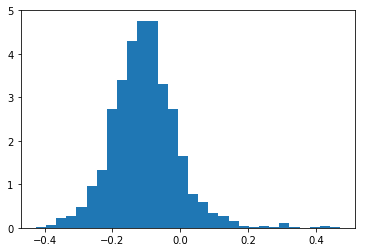

In [6]:
plt.hist(ld50,bins=30,density=True)

In [7]:
print(np.percentile(ld50,(2.5,25,50,75,97.5)))

[-0.28843161 -0.16430022 -0.10772703 -0.05167963  0.1060967 ]
